In [1]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import sys
sys.path.append('../src')
import data_loader

In [2]:
# Load the data
df = data_loader.uni_load_flow_data('../data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

In [3]:
# Select features and convert to NumPy arrays
x_train = df['Total Fwd Packets'].to_numpy()
y_train = df['Total Length of Fwd Packets'].astype(float).to_numpy()
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

x_train = [3 4 3 ... 4 3 4]
y_train = [26. 24. 26. ... 24. 26. 24.]


Plot the original data for visualisation

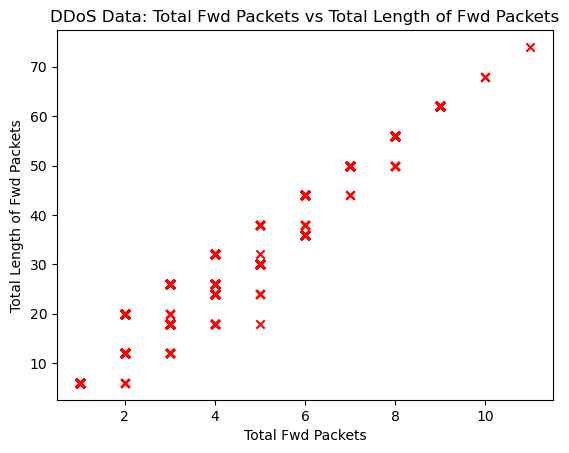

In [4]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("DDoS Data: Total Fwd Packets vs Total Length of Fwd Packets")
# Set the y-axis label
plt.ylabel('Total Length of Fwd Packets')
# Set the x-axis label
plt.xlabel('Total Fwd Packets')
plt.show()

The linear regression with each data point: $$
    f_{wb}(x^{(i)}) =  wx^{(i)} + b 
    $$

The cost function defines how well the model is performing by comparing the predicted output with the actual output.
The cost for each data point:
$$cost^{(i)} =  (f_{wb} - y^{(i)})^2$$

The total cost for all data points, where $m$ is the number of data points:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$


In [5]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) total fwd packets
        y (ndarray): Shape (m,) total length of fwd packets
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        total_cost = total_cost + cost
    total_cost = (1 / (2 * m)) * total_cost
    
    return total_cost

Using gradient descent, we determine the optimal parameters for the linear regression model that results in the minimum cost.

The gradient descent algorithm:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value

In [6]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) total fwd packets
      y (ndarray): Shape (m,) total length of fwd packets
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    m = x.shape[0]
    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
            
    return dj_dw, dj_db

In [7]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of data points
    m = len(x)
    
    # An array to store cost J and w's at each iteration 
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [8]:
# initialize fitting parameters
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost   335.01   
Iteration  150: Cost     8.19   
Iteration  300: Cost     7.92   
Iteration  450: Cost     7.74   
Iteration  600: Cost     7.63   
Iteration  750: Cost     7.56   
Iteration  900: Cost     7.51   
Iteration 1050: Cost     7.48   
Iteration 1200: Cost     7.46   
Iteration 1350: Cost     7.45   
w,b found by gradient descent: 6.046933548443009 4.800234859821193


In [9]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

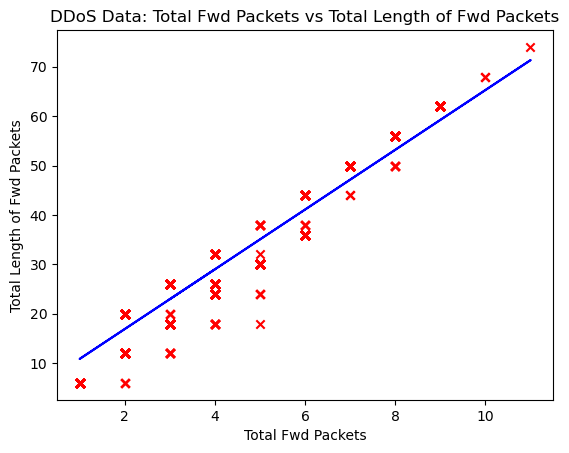

In [10]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 
# Set the title
plt.title("DDoS Data: Total Fwd Packets vs Total Length of Fwd Packets")
# Set the y-axis label
plt.ylabel('Total Length of Fwd Packets')
# Set the x-axis label
plt.xlabel('Total Fwd Packets')
plt.show()

In [14]:
predict1 = 3.5 * w + b
print(f'For Total Fwd Packets = 4, we predict a Total Length of Fwd Packets = {math.ceil(predict1)}')

For Total Fwd Packets = 4, we predict a Total Length of Fwd Packets = 26
